# Stock Market Prediction Project

## Load Important Libraries We use this Project

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load DataSet and Cleaning Data

In [36]:
df = pd.read_csv("data.csv")

In [37]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Jan 6, 2026",267.00,267.55,262.12,262.36,262.36,"52,282,100"
1,"Jan 5, 2026",270.64,271.51,266.14,267.26,267.26,"45,647,200"
2,"Jan 2, 2026",272.26,277.84,269.00,271.01,271.01,"37,838,100"
3,"Dec 31, 2025",273.06,273.68,271.75,271.86,271.86,"27,293,600"
4,"Dec 30, 2025",272.81,274.08,272.28,273.08,273.08,"22,139,600"


In [38]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1273,"Jan 8, 2021",132.43,132.63,130.23,132.05,128.54,"105,158,200"
1274,"Jan 7, 2021",128.36,131.63,127.86,130.92,127.44,"109,578,200"
1275,"Jan 6, 2021",127.72,131.05,126.38,126.60,123.24,"155,088,000"
1276,"Jan 5, 2021",128.89,131.74,128.43,131.01,127.53,"97,664,900"
1277,"Jan 4, 2021",133.52,133.61,126.76,129.41,125.97,"143,301,900"


In [39]:
print("Total Rows :",df.shape[0])
print("Total Columns :",df.shape[1])

Total Rows : 1278
Total Columns : 7


In [40]:
df.describe()

,Open,Low,Close,Adj Close
count,1278.000000,1258.000000,1258.000000,1258.000000
mean,178.712778,179.758792,181.722432,179.749499
std,45.098985,39.153415,39.418135,40.271161
min,0.200000,116.210000,116.360000,113.440000
25%,148.310000,147.465000,149.000000,146.127500
50%,173.240000,172.260000,174.410000,171.820000
75%,210.490000,208.887500,211.247500,210.800000
max,286.200000,283.300000,286.190000,286.190000


In [41]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Jan 6, 2026",267.00,267.55,262.12,262.36,262.36,"52,282,100"
1,"Jan 5, 2026",270.64,271.51,266.14,267.26,267.26,"45,647,200"
2,"Jan 2, 2026",272.26,277.84,269.00,271.01,271.01,"37,838,100"
3,"Dec 31, 2025",273.06,273.68,271.75,271.86,271.86,"27,293,600"
4,"Dec 30, 2025",272.81,274.08,272.28,273.08,273.08,"22,139,600"
...,...,...,...,...,...,...,...
1273,"Jan 8, 2021",132.43,132.63,130.23,132.05,128.54,"105,158,200"
1274,"Jan 7, 2021",128.36,131.63,127.86,130.92,127.44,"109,578,200"
1275,"Jan 6, 2021",127.72,131.05,126.38,126.60,123.24,"155,088,000"
1276,"Jan 5, 2021",128.89,131.74,128.43,131.01,127.53,"97,664,900"


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1278 non-null   object 
 1   Open       1278 non-null   float64
 2   High       1278 non-null   object 
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   object 
dtypes: float64(4), object(3)
memory usage: 70.0+ KB


In [43]:
# Date ko sahi format mein lana
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.sort_index()

In [44]:
# convert high column datatype to float
df['High'] = pd.to_numeric(df['High'], errors='coerce')

# remove commas between volume values
df['Volume'] = df['Volume'].str.replace(',', '')

# Now we convert volume column datatype to float
df['Volume'] = pd.to_numeric(df['Volume'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1278 entries, 2021-01-04 to 2026-01-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1278 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   float64
dtypes: float64(6)
memory usage: 69.9 KB


In [46]:
df.isnull().sum()

Open          0
High         20
Low          20
Close        20
Adj Close    20
Volume       20
dtype: int64

In [47]:
# 1. Wo rows dhoondo jahan kisi bhi column mein NaN hai
# axis=1 ka matlab hai hum 'Row' check kar rahe hain
null_rows = df[df.isnull().any(axis=1)]
null_rows.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-05,0.20,NaN,NaN,NaN,NaN,NaN
2021-05-07,0.22,NaN,NaN,NaN,NaN,NaN
2021-08-06,0.22,NaN,NaN,NaN,NaN,NaN
2021-11-05,0.22,NaN,NaN,NaN,NaN,NaN
2022-02-04,0.22,NaN,NaN,NaN,NaN,NaN


In [48]:
print(f"Before Cleaning Total Rows = {len(df)}")

Before Cleaning Total Rows = 1278


In [49]:
# remove all empty rows 
df.dropna(inplace=True)

In [50]:
# 3. Dobara ginte hain
print(f"After Cleaning Total Rows = {len(df)}")

After Cleaning Total Rows = 1258


In [51]:
df.isnull().sum().sum()

0

In [52]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,181.550231,183.518124,179.758792,181.722432,179.749499,6.975693e+07
std,39.387852,39.649176,39.153415,39.418135,40.271161,2.995256e+07
min,119.030000,120.400000,116.210000,116.360000,113.440000,1.791060e+07
25%,148.877500,150.347500,147.465000,149.000000,146.127500,4.828900e+07
50%,173.990000,175.870000,172.260000,174.410000,171.820000,6.298645e+07
75%,210.930000,213.580000,208.887500,211.247500,210.800000,8.449362e+07
max,286.200000,288.620000,283.300000,286.190000,286.190000,3.186799e+08


In [53]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2025-12-30,272.81,274.08,272.28,273.08,273.08,22139600.0
2025-12-31,273.06,273.68,271.75,271.86,271.86,27293600.0
2026-01-02,272.26,277.84,269.00,271.01,271.01,37838100.0
2026-01-05,270.64,271.51,266.14,267.26,267.26,45647200.0
2026-01-06,267.00,267.55,262.12,262.36,262.36,52282100.0


In [54]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.52,133.61,126.76,129.41,125.97,143301900.0
2021-01-05,128.89,131.74,128.43,131.01,127.53,97664900.0
2021-01-06,127.72,131.05,126.38,126.60,123.24,155088000.0
2021-01-07,128.36,131.63,127.86,130.92,127.44,109578200.0
2021-01-08,132.43,132.63,130.23,132.05,128.54,105158200.0


## Insights of Stock Dataset

### Step 1: Data "Information" Like (Starting Date) AND (Ending Date)

In [55]:
print(f"Data Kahan se Shuru hua: {df.index.min().date()}")
print(f"Data Kahan Khatam hua:   {df.index.max().date()}")
print(f"Total Din (Rows):        {len(df)}")

Data Kahan se Shuru hua: 2021-01-04
Data Kahan Khatam hua:   2026-01-06
Total Din (Rows):        1258


### Step 2: Market Situation (High, Low, Average)

In [56]:
highest_price = df['High'].max()
lowest_price = df['Low'].min()
avg_price = df['Close'].mean()

print(f"Highest Price (All Time High) = ${highest_price:.2f}")
print(f"Lowest Price (All Time Low) = ${lowest_price:.2f}")
print(f"Average Price (Aukat) = ${avg_price:.2f}")

Highest Price (All Time High) = $288.62
Lowest Price (All Time Low) = $116.21
Average Price (Aukat) = $181.72


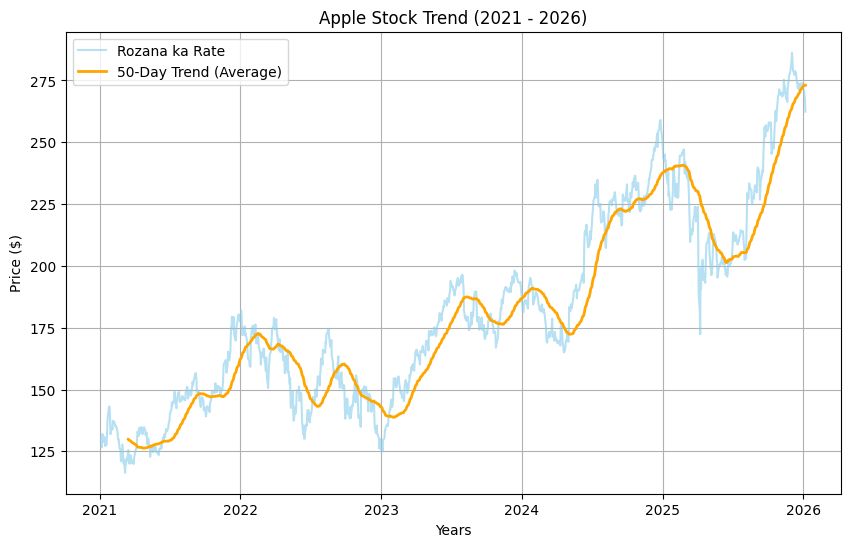

In [57]:
# Moving Average banana (Pichle 50 din ka average)
df['MA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(10, 6))

# Asal Price (Blue Line)
plt.plot(df.index, df['Close'], label='Rozana ka Rate', color='skyblue', alpha=0.6)

# Trend Line (Orange Line - Ye smooth hoti hai)
plt.plot(df.index, df['MA50'], label='50-Day Trend (Average)', color='orange', linewidth=2)

plt.title("Apple Stock Trend (2021 - 2026)")
plt.xlabel("Years")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()

In [58]:
# Rozana ka % change nikalna
df['Daily_Return'] = df['Close'].pct_change() * 100

best_day = df['Daily_Return'].max()
worst_day = df['Daily_Return'].min()

print(f"One Day Biggest Profit = {best_day:.2f}%")
print(f"One Day Bigest Lose = {worst_day:.2f}%")

One Day Biggest Profit = 15.33%
One Day Bigest Lose = -9.25%


## Stock Price Prediction Model

In [59]:
# --- STEP 1: Target Set Karna (Humein kya predict karna hai?) ---
# Hum chahte hain ke Model 'Aaj' ka data dekh kar 'Kal' ki Closing Price bataye.
# .shift(-1) ka matlab: Agle din ki price ko peeche khinch kar aaj ke saamne rakh do.
df['Next_Close'] = df['Close'].shift(-1)

In [60]:
# Aakhri din (Jan 6) ke paas 'Next_Close' nahi hoga (kyunki Jan 7 ka data nahi hai), to usay alag rakhte hain prediction ke liye.
future_data = df.tail(1).drop(columns=['Next_Close']) # Isay hum end mein use karenge
df_model = df.dropna() # Baaki data training ke liye

In [61]:
# --- STEP 2: Sawal (X) aur Jawab (y) ---
features = ['Open', 'High', 'Low', 'Volume']
X = df_model[features]       # Sawal (Aaj ka market behavior)
y = df_model['Next_Close']   # Jawab (Kal ki price)

In [62]:
# --- STEP 3: Data Split (Padhai vs Exam) ---
# shuffle=False zaroori hai stock market mein (Hum future ka data dekh kar past nahi seekh sakte)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [63]:
# --- STEP 4: Model Training ---
model = LinearRegression()
model.fit(X_train, y_train) # Computer seekh raha hai...

LinearRegression()

In [64]:
# --- STEP 5: Report Card (Accuracy) ---
score = model.score(X_test, y_test)
print(f"\n🎯 Model Accuracy (Score): {score*100:.2f}%")
print("(Jitna 100% ke qareeb, utna behtar!)")


🎯 Model Accuracy (Score): 97.15%
(Jitna 100% ke qareeb, utna behtar!)


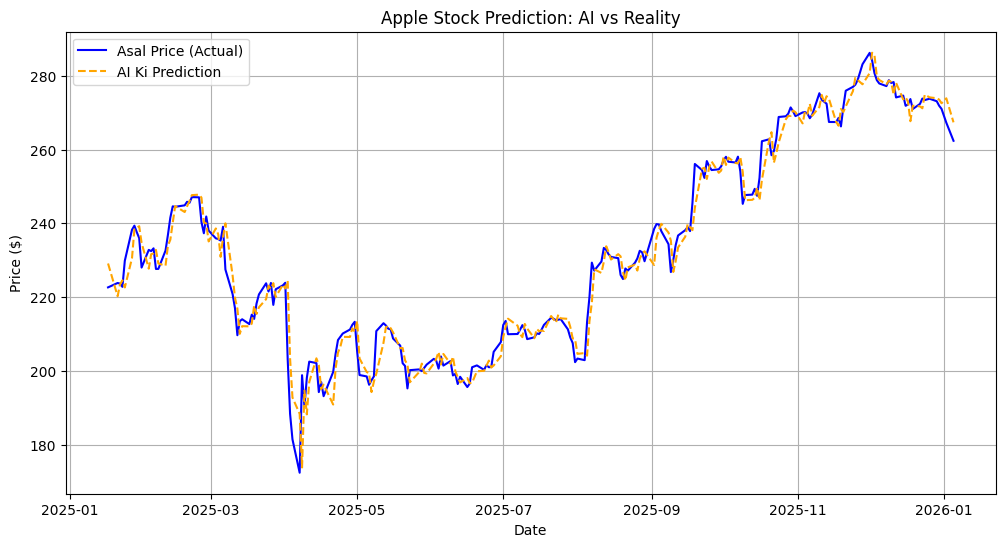

In [65]:
# --- STEP 6: Visualization (Sach vs Jhoot) ---
predictions = model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Asal Price (Actual)', color='blue')
plt.plot(y_test.index, predictions, label='AI Ki Prediction', color='orange', linestyle='--')
plt.title("Apple Stock Prediction: AI vs Reality")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()

## Prediction

In [66]:
last_day_features = future_data[features]
future_pred = model.predict(last_day_features)

print("--- FUTURE PREDICTION ---")
print(f"Predict what Apple's share price will be on Jan 7, 2026. ${future_pred[0]:.2f}")
print("-----------------------------------")

--- FUTURE PREDICTION ---
Predict what Apple's share price will be on Jan 7, 2026. $263.11
-----------------------------------
